## 🔷 **What is Data Transformation?**

**Data transformation** is the process of **modifying data** into a format that is more suitable for analysis or modeling. It involves applying **mathematical functions or rules** to variables to:

* Improve model accuracy
* Handle skewness
* Make relationships more linear
* Normalize distributions
* Reduce the effect of outliers

## ✅ **Types of Data Transformation**

### 1. **Scaling Transformation**

Changes the **scale** of the data.

* **Standardization (Z-score):**

  $$
  X' = \frac{X - \mu}{\sigma}
  $$

  Mean = 0, Std Dev = 1

* **Min-Max Scaling:**

  $$
  X' = \frac{X - \text{min}}{\text{max} - \text{min}}
  $$

  Rescales data to \[0, 1]

* **MaxAbs Scaling:**

  $$
  X' = \frac{X}{\text{max}(|X|)}
  $$

  Keeps sign, good for sparse data

### 2. **Nonlinear Transformation**

Used to **reduce skewness** or **normalize** the distribution.

#### 🔹 **Log Transformation**

* Reduces right-skewness
* $$
  X' = \log(X)
  $$

#### 🔹 **Square Root Transformation**

* Less aggressive than log
* $$
  X' = \sqrt{X}
  $$

#### 🔹 **Reciprocal Transformation**

* $$
  X' = \frac{1}{X}
  $$

### 3. **Power Transformation**

Used to **stabilize variance** and **make data more normal**.

#### 🔹 **Box-Cox Transformation**

* Only for **positive** data
* $$
  X' = \text{BoxCox}(X, \lambda)
  $$

#### 🔹 **Yeo-Johnson Transformation**

* Works for **zero or negative** values
* More flexible than Box-Cox

#### ✅ **Sklearn Example**:

```python
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')  # or 'box-cox' for positive data only
transformed_data = pt.fit_transform(data)
```
### 4. **Quantile Transformation**

Maps the distribution of data to another distribution like **normal** or **uniform**.

```python
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')
qt_data = qt.fit_transform(data)
```

---

## 📌 Summary Table

| Transformation     | Use When                  | Handles Negative? | Goal                             |
| ------------------ | ------------------------- | ----------------- | -------------------------------- |
| Log                | Right-skewed data         | ❌ No              | Normalize, compress large values |
| Square Root        | Mildly skewed data        | ❌ No              | Reduce skewness                  |
| Reciprocal         | Very skewed data          | ❌ No              | Reduce impact of large values    |
| Box-Cox            | Non-normal, positive data | ❌ No              | Make normal-like                 |
| Yeo-Johnson        | Non-normal data           | ✅ Yes             | Make normal-like                 |
| Quantile Transform | Irregular distributions   | ✅ Yes             | Map to normal/uniform            |



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

In [3]:
# Generate exponential data (highly right-skewed)
data = np.random.exponential(scale=2.0, size=1000)

In [4]:
# Convert to DataFrame
df = pd.DataFrame(data, columns = ["feature"])
df

,feature
0,0.938536
1,6.020243
2,2.633491
3,1.825885
4,0.339250
...,...
995,0.192101
996,4.985400
997,0.294261
998,6.000981


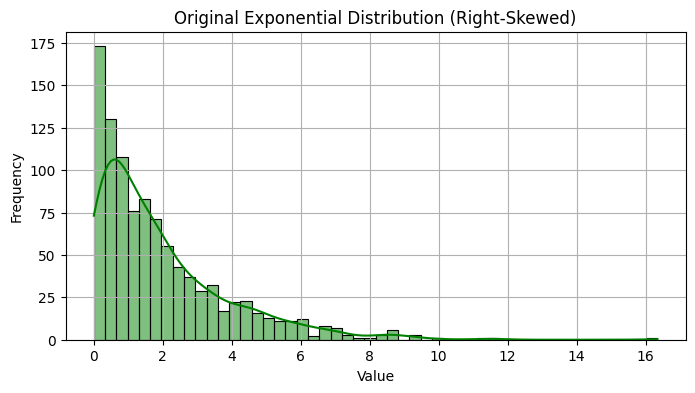

In [5]:
# Plot histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['feature'], bins=50, kde=True, color='green')
plt.title('Original Exponential Distribution (Right-Skewed)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [6]:
from sklearn.preprocessing import QuantileTransformer, PowerTransformer

In [7]:
# Apply PowerTransformer with Yeo-Johnson (default)
pt = PowerTransformer(method='yeo-johnson', standardize=True)
df['yeo_transformed'] = pt.fit_transform(df[['feature']])

# Optional: Try Box-Cox (only works if all values > 0)
pt_bc = PowerTransformer(method='box-cox')
df['boxcox_transformed'] = pt_bc.fit_transform(df[['feature']]) 

In [8]:
# Quantile Transformer to normal distribution
qt = QuantileTransformer(output_distribution='normal')
df['qt_transformed'] = qt.fit_transform(df[['feature']])

In [9]:
# Apply log transformation
df['Log_Transformed'] = np.log1p(df['feature'])  # log(1 + x) for safety

In [10]:
# Apply square root transformation
df['Sqrt_Transformed'] = np.sqrt(df['feature'])

In [11]:
df.head()

,feature,yeo_transformed,boxcox_transformed,qt_transformed,Log_Transformed,Sqrt_Transformed
0,0.938536,-0.342865,-0.273777,-0.273089,0.661933,0.968781
1,6.020243,1.644439,1.640981,1.738731,1.948798,2.453618
2,2.633491,0.746073,0.680543,0.645631,1.290194,1.622804
3,1.825885,0.340704,0.313725,0.286135,1.038822,1.351253
4,0.339250,-1.113723,-1.005096,-0.933910,0.292110,0.582451


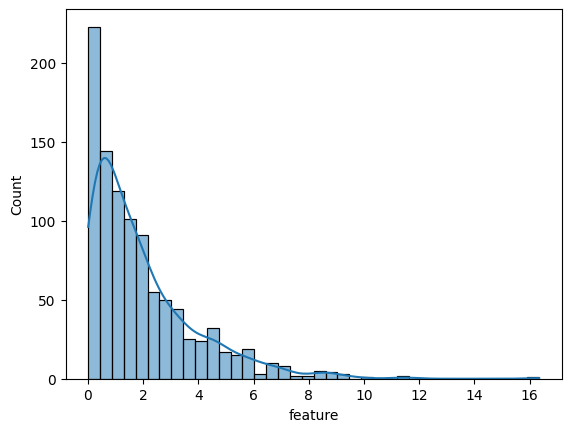

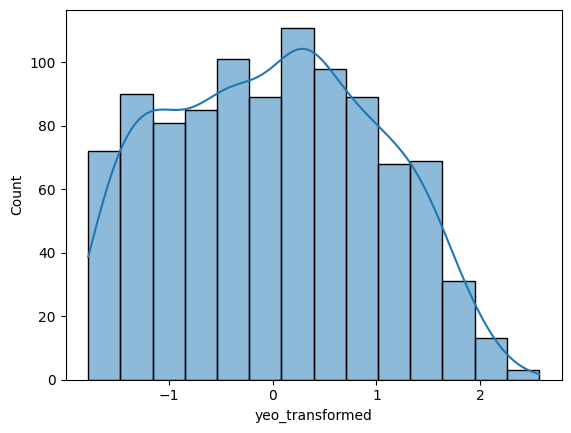

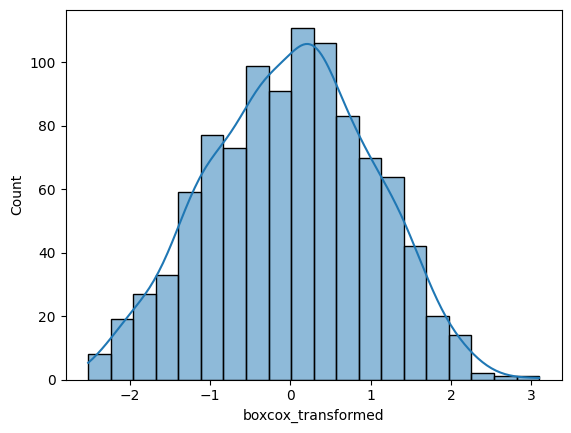

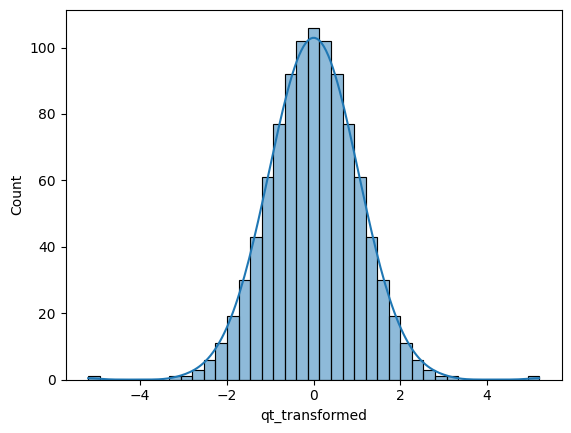

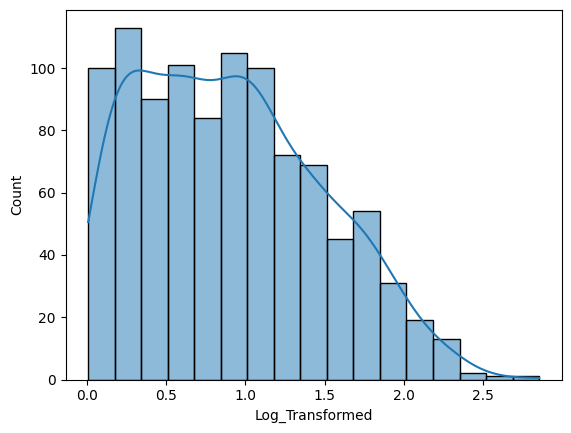

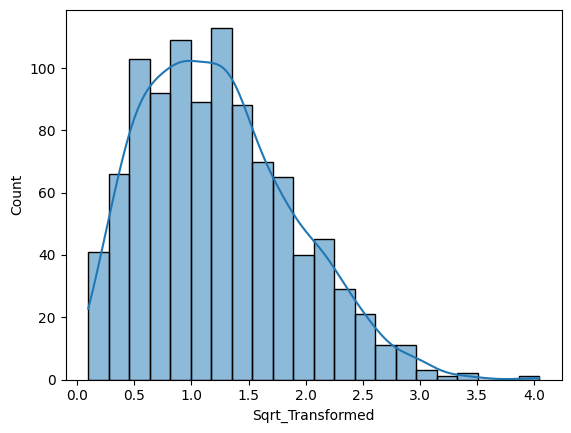

In [12]:
# creata hostograms for all columns using sns.hist and kde=true use a for loop
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()

## 🔑 **Quick Tips:**

* Use **log**, **sqrt**, or **reciprocal** for **skewed data**.
* Use **Box-Cox** or **Yeo-Johnson** for **normality**.
* Use **Z-score** or **MinMaxScaler** for **scaling features** before modeling.
* Use **QuantileTransformer** to force data into **uniform/normal distribution**.
* Use **RobustScaler** if your data has **outliers**.
